Notebook made to Create the FSM using Linear regression.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
import os 
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.js_functions import adj_rsqaured
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("../../Data/Imputed.csv")

In [3]:
df

,HINCP,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,47900.0,3.0,350.0,6.0,75600.0,47900.0,703.8,1575.0
1,36100.0,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,100000.0,0.0,460.0,1.0,250000.0,55186.8,1443.0,6700.0
3,45000.0,2.0,516.0,5.0,134600.0,53542.0,893.6,4210.0
4,88000.0,3.0,774.0,6.0,154000.0,104880.0,1548.6,3880.0
...,...,...,...,...,...,...,...,...
202609,62000.0,4.0,0.0,11.0,150000.0,270000.0,1366.0,6500.0
202610,151700.0,4.0,1200.0,8.0,275000.0,150000.0,2603.0,10500.0
202611,90700.0,3.0,550.0,6.0,145000.0,85000.0,751.0,5750.0
202612,284500.0,4.0,990.0,10.0,500000.0,117500.0,1168.0,11500.0


In [4]:
df.columns

Index(['HINCP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'FINCP', 'SMOCP', 'TAXAMT'], dtype='object')

In [5]:
# #setting our dependent and independent variables
# X=df.drop(["HINCP_x","PUMA"],axis=1)
# y=df["HINCP_x"]

In [8]:
X=df[["BDSP","RMSP"]]
y=df["HINCP"]

In [9]:
#splitting our data to allow for modeling
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=.8,random_state=2020)

In [10]:
y_test

139159     79100.0
101336     40000.0
72301     136200.0
16493      83000.0
1740       80020.0
            ...   
196090    140000.0
163301     20800.0
13982     103000.0
17801     100000.0
22139      41000.0
Name: HINCP, Length: 40523, dtype: float64

In [11]:
X_test

,BDSP,RMSP
139159,4.0,9.0
101336,4.0,8.0
72301,2.0,4.0
16493,2.0,5.0
1740,2.0,7.0
...,...,...
196090,3.0,7.0
163301,3.0,8.0
13982,1.0,3.0
17801,4.0,10.0


In [12]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
lr.score(X_train,y_train)

3.2530552662723977e-06

In [16]:
r2_score=lr.score(X_train,y_train)

In [17]:
scores= cross_val_score(lr,X_train,y_train,cv=5)

In [18]:
scores.mean()

-0.0002234591459850499

In [19]:
adj_rsqaured(lr,X_train,y_train)

-9.08588095271945e-06

First Initial model is completed and it is performing fairly well, let see how it performs with scaled data.

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [21]:
#instantiating our scalrs
ss_x=StandardScaler()
mm_x=MinMaxScaler()

In [22]:
#fitting our standard scalar
X_train_ss=ss_x.fit_transform(X_train)

In [23]:
#fitting out minmax scalar 
X_train_mm=mm_x.fit_transform(X_train)

In [24]:
lr2=LinearRegression()

In [25]:
lr2.fit(X_train_ss,y_train)

LinearRegression()

In [26]:
lr2.score(X_train_ss,y_train)

3.2530552662723977e-06

In [27]:
scores1= cross_val_score(lr2,X_train_ss,y_train,cv=5)

In [28]:
scores1.mean()

-0.0002234591459849611

The model is performing very simialr to the FSM so scaling does not seem to affect this model to much.

In [29]:
lr3=LinearRegression()

In [30]:
lr3.fit(X_train_mm,y_train)

LinearRegression()

In [31]:
lr3.score(X_train_mm,y_train)

3.2530552662723977e-06

In [32]:
scores2= cross_val_score(lr3,X_train_mm,y_train,cv=5)

In [33]:
scores2.mean()

-0.0002234591459850499

This model is performing similar to the standard scalar model. These models seem to explain about 40% of the vairance within the data.

Trying OLS Linear regression it has more atrributes to look at for a deeper dive potentially.

In [34]:
df=pd.read_csv("../../Data/Imputed.csv")

In [35]:
df

,HINCP,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,47900.0,3.0,350.0,6.0,75600.0,47900.0,703.8,1575.0
1,36100.0,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,100000.0,0.0,460.0,1.0,250000.0,55186.8,1443.0,6700.0
3,45000.0,2.0,516.0,5.0,134600.0,53542.0,893.6,4210.0
4,88000.0,3.0,774.0,6.0,154000.0,104880.0,1548.6,3880.0
...,...,...,...,...,...,...,...,...
202609,62000.0,4.0,0.0,11.0,150000.0,270000.0,1366.0,6500.0
202610,151700.0,4.0,1200.0,8.0,275000.0,150000.0,2603.0,10500.0
202611,90700.0,3.0,550.0,6.0,145000.0,85000.0,751.0,5750.0
202612,284500.0,4.0,990.0,10.0,500000.0,117500.0,1168.0,11500.0


In [36]:
fsm_ols=df

In [37]:
pd.set_option('display.max_columns', None)


In [38]:
fsm_ols

,HINCP,BDSP,INSP,RMSP,VALP,FINCP,SMOCP,TAXAMT
0,47900.0,3.0,350.0,6.0,75600.0,47900.0,703.8,1575.0
1,36100.0,3.0,600.0,6.0,35000.0,36100.0,691.0,525.0
2,100000.0,0.0,460.0,1.0,250000.0,55186.8,1443.0,6700.0
3,45000.0,2.0,516.0,5.0,134600.0,53542.0,893.6,4210.0
4,88000.0,3.0,774.0,6.0,154000.0,104880.0,1548.6,3880.0
...,...,...,...,...,...,...,...,...
202609,62000.0,4.0,0.0,11.0,150000.0,270000.0,1366.0,6500.0
202610,151700.0,4.0,1200.0,8.0,275000.0,150000.0,2603.0,10500.0
202611,90700.0,3.0,550.0,6.0,145000.0,85000.0,751.0,5750.0
202612,284500.0,4.0,990.0,10.0,500000.0,117500.0,1168.0,11500.0


In [39]:
# fsm_ols.columns=['HINCP_x','SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
#        'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2',
#        'BUS_9', 'FS_1', 'FS_2', 'TOIL_1', 'TOIL_2',
#        'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
#        'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2',
#        'YBL_3', 'YBL_4', 'YBL_5', 'YBL_6', 'YBL_7',
#        'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
#        'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17',
#        'YBL_18', 'YBL_19', 'YBL_20', 'YBL_21', 'YBL_22']

In [40]:
fsm_ols.columns

Index(['HINCP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'FINCP', 'SMOCP', 'TAXAMT'], dtype='object')

In [41]:
# fsm_columns=['SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
#        'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2',
#        'BUS_9', 'FS_1', 'FS_2', 'TOIL_1', 'TOIL_2',
#        'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
#        'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2',
#        'YBL_3', 'YBL_4', 'YBL_5', 'YBL_6', 'YBL_7',
#        'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
#        'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17',
#        'YBL_18', 'YBL_19', 'YBL_20', 'YBL_21', 'YBL_22']

In [42]:
# fsm_columns1=['SMOCP', 'NP', 'BDSP', 'INSP', 'RMSP', 'VALP', 'TAXAMT',
#        'ACR_1', 'ACR_2', 'ACR_3', 'BUS_1', 'BUS_2',
#        'BUS_9', 'FS_1', 'FS_2', 'TOIL_1', 'TOIL_2',
#        'TOIL_9', 'VEH_0', 'VEH_1', 'VEH_2', 'VEH_3',
#        'VEH_4', 'VEH_5', 'VEH_6', 'YBL_1', 'YBL_2',
#        'YBL_3', 'YBL_4', 'YBL_5', 'YBL_6', 'YBL_7',
#        'YBL_8', 'YBL_9', 'YBL_10', 'YBL_11', 'YBL_12',
#        'YBL_13', 'YBL_14', 'YBL_15', 'YBL_16', 'YBL_17',
#        'YBL_18', 'YBL_19', 'YBL_20', 'YBL_21', 'YBL_22']

In [52]:
fsm_columns= ['BDSP','RMSP']

In [53]:
predictors = '+'.join(fsm_columns)

In [54]:
predictors

'BDSP+RMSP'

In [55]:
formula="HINCP ~ " + predictors

In [56]:
# formula= "HINCP ~ BDSP + INSP + RMSP + VALP + FINCP + SMOCP +TAXAMT" 

In [57]:
fsm=ols(formula=formula,data=fsm_ols).fit()

In [58]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HINCP   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1665
Date:                Sun, 02 Jan 2022   Prob (F-statistic):              0.847
Time:                        17:32:54   Log-Likelihood:            -2.6021e+06
No. Observations:              202614   AIC:                         5.204e+06
Df Residuals:                  202611   BIC:                         5.204e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.521e+04    590.605    144.278      0.000    8.41e+04    8.64e+04
BDSP         151.4370    290.627      0.521      0.602    -418.185     721.059
RMSP         -31.3434    130.535     -0.240      0.810    -287.188     224.502
==============================================================================
Omnibus:                   159232.243   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4177393.144
Skew:                           3.643   Prob(JB):                         0.00
Kurtosis:                      24.018   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Time for Assumptions check

Linearity

In [58]:
from statsmodels.stats.diagnostic import linear_rainbow,het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

rainbow_statisic, rainbow_p_value=linear_rainbow(fsm)
print("Rainbow Statistic:",rainbow_statisic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow Statistic: 0.9709458196481424
Rainbow p-value: 0.9999986479578276


Normality

C:\Users\Ice\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


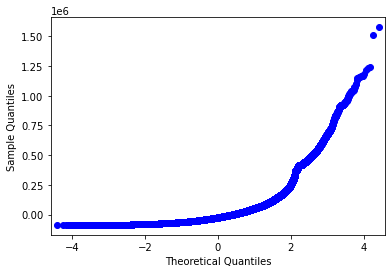

In [59]:
fsm_resids=fsm.resid

import statsmodels.api as sm
sm.qqplot(fsm_resids);

Homoscadaacity

In [60]:
y_hat=fsm.predict()


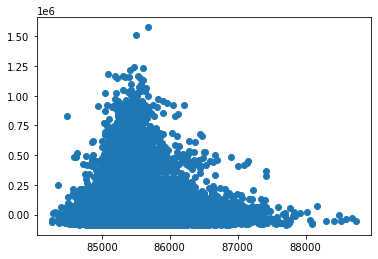

In [61]:
plt.scatter(y_hat,fsm_resids);

In [62]:
lm, lm_p_value, fvalue,f_p_value=het_breuschpagan(fsm_resids,fsm_ols[["TAXAMT"]])
print("Lagrange Multipler p-value:", lm_p_value)
print("F-Statistic p-value:",f_p_value)

Lagrange Multipler p-value: nan
F-Statistic p-value: 0.0


### Next step for this is to modify variables and then the model selectors as well. The coefficients are a bit estranged will need to look into how it is reading my variables as well.